Import the pandas library and call the DataFrame() function.

In [60]:
import pandas as pd

In [61]:
data = pd.read_csv('phoneme_csv.csv')

The top 5 rows of the dataset by using head() method

In [62]:
data.head()

,V1,V2,V3,V4,V5,Class
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418,1
1,-0.641265,0.109245,0.292130,-0.916804,0.240223,1
2,0.870593,-0.459862,0.578159,0.806634,0.835248,1
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583,1
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127,1


The last 5 rows of the dataset

In [63]:
data.tail()

,V1,V2,V3,V4,V5,Class
5399,-0.658318,1.331760,-0.081621,1.794253,-1.082181,1
5400,-0.044375,-0.010512,0.030989,-0.019379,1.281061,2
5401,0.246882,-0.793228,1.190101,1.423194,-1.303036,2
5402,-0.778907,-0.383111,1.727029,-1.432389,-1.208085,1
5403,-0.794604,-0.640053,0.632221,0.720280,-1.231182,2


In [64]:
X = data.drop('Class', axis = 1)
y = data['Class']

.info() method of DataFrame to get useful information about the data

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 6 columns):
V1       5404 non-null float64
V2       5404 non-null float64
V3       5404 non-null float64
V4       5404 non-null float64
V5       5404 non-null float64
Class    5404 non-null int64
dtypes: float64(5), int64(1)
memory usage: 253.4 KB


To get more summary statistics of the different features in the dataset and use the describe()
method

In [66]:
data.describe()


,V1,V2,V3,V4,V5,Class
count,5.404000e+03,5.404000e+03,5.404000e+03,5.404000e+03,5.404000e+03,5404.000000
mean,3.330866e-09,5.551443e-09,6.106588e-09,-9.437454e-09,-6.698742e-08,1.293486
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.455401
min,-2.933743e+00,-3.038709e+00,-2.795869e+00,-2.485340e+00,-2.367461e+00,1.000000
25%,-6.697555e-01,-7.790800e-01,-9.505788e-01,-7.583255e-01,-5.405418e-01,1.000000
50%,-3.801605e-01,-2.150985e-01,-3.861800e-02,-1.422555e-01,-2.127475e-01,1.000000
75%,3.149040e-01,7.136990e-01,7.771392e-01,6.759035e-01,2.045420e-01,2.000000
max,3.828575e+00,3.664763e+00,2.630868e+00,3.046948e+00,4.586666e+00,2.000000


In [67]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

Separate the target variable and rest of the variable using .iloc to subset the data.

In [68]:
X, y = data.iloc[:, : 1], data.iloc[:, 2]

Now you will convert the dataset into an optimized data structure called DMatrix that XGBoost 
supports and gives it acclaimed performance and efficiency gains.

In [69]:
data_dmatrix = xgb.DMatrix(data = X, label = y)

/home/chi/anaconda3/envs/scikitEnv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/chi/anaconda3/envs/scikitEnv/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBoost's hyperparameters

We will create the train and test set for cross-validation of the results using train_test_split
function from sklearn's model_selection model with test_size size equal to 20% of the data. 
Also, to mantain reproducibility of the results, a random_state is also assigned.

In [70]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

The next step is to instantiate an XGBoost regressor object by calling the XGBRegressor()
class from the XGBoost library with the hyperparameters passed as arguments. For classification
problems, you would have used the XGBClassifier() class

In [74]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

Fit the regressor to the training set and make predictions on the test set using familiar 
.fit() and .predict() methods

In [75]:
xg_reg.fit(X_train, y_train)

[16:17:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [76]:
preds = xg_reg.predict(X_test)

Compute the rmse by invoking the mean_squared_error function from sklearn's metrics module.

In [77]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" %(rmse))

RMSE: 0.952349


Well, you can see that your RMSE for the price prediction came out to be around 0.95 per 1 $ 

k-fold Cross Validation using XGBoost

In [78]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [79]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[16:17:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


cv_results contains train and test RMSE metrics for each boosting round.

In [80]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.079988,0.005263,1.080828,0.011371
1,1.048021,0.004856,1.049629,0.011772
2,1.021288,0.004695,1.023666,0.011666
3,0.998898,0.004520,1.002064,0.011646
4,0.980130,0.004175,0.984135,0.011518


Extract and print the final boosting round metric.

In [81]:
print((cv_results["test-rmse-mean"]).tail(1))

39    0.899024
Name: test-rmse-mean, dtype: float64


Visualizing Boosting Trees and feature Importance


You can also visualize individual trees from the fully boosted model that XGBoost creates using 
the entire phoneme dataset XGBoost has a plot_tree() function that makes this type of visualization
easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree()
function along with the number of trees you want to plot using the num_trees argument

In [82]:
xg_reg = xgb.train(params = params, dtrain = data_dmatrix, num_boost_round = 10)

[16:18:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Plotting the first tree with matplotlib library

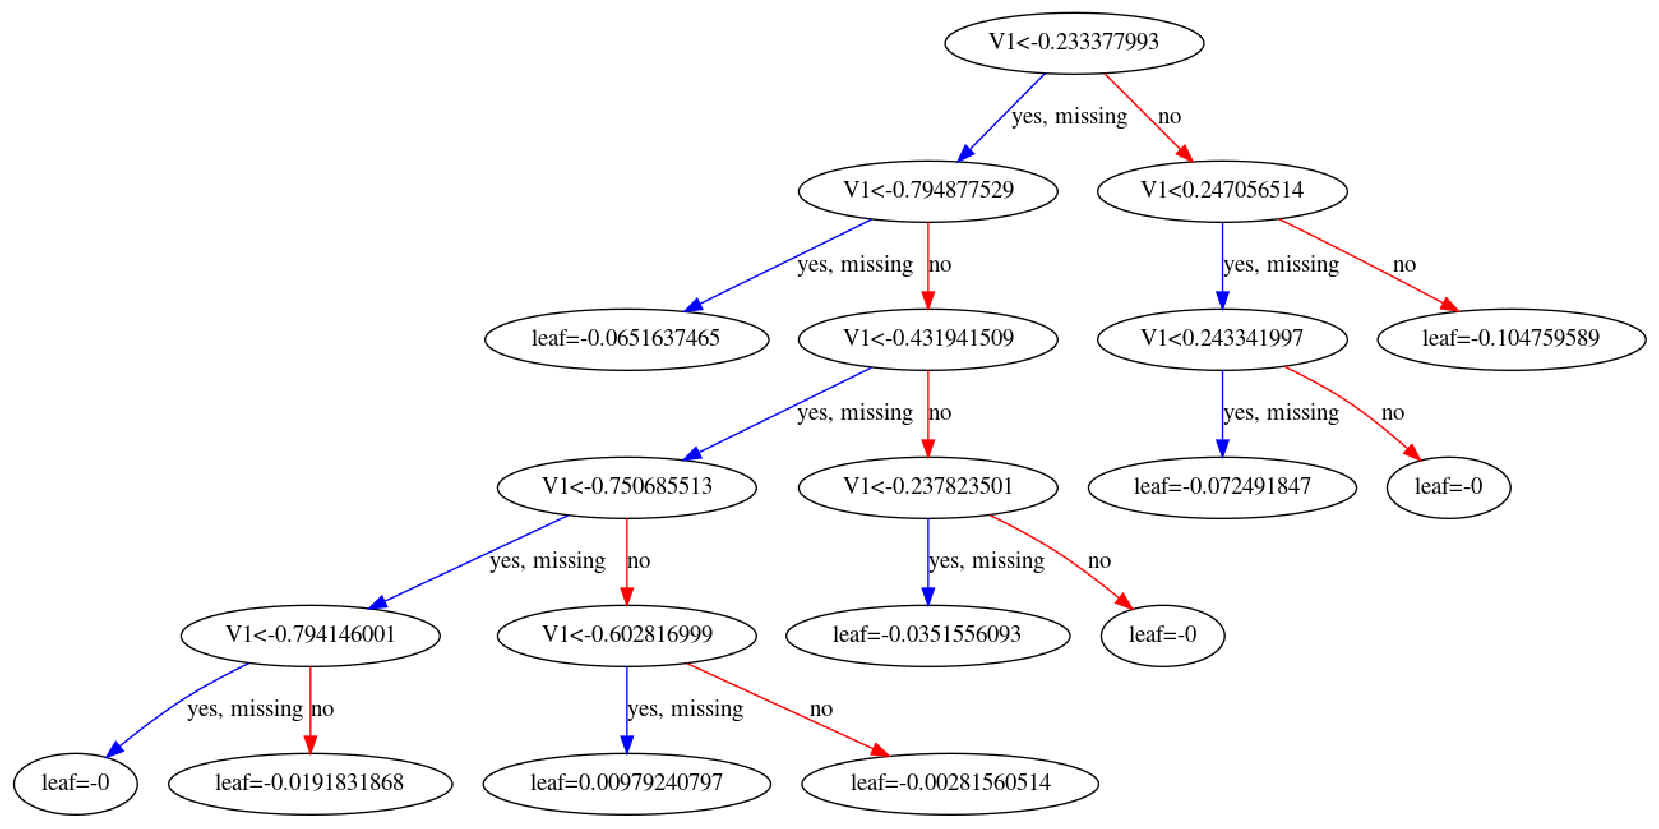

In [85]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg, num_trees = 0)
plt.rcParams['figure.figsize'] = [75, 20]
plt.show()